### A Reinforcement learning(Q-lerning) approach for solving a practical problem for warehouse robot
### ## Scenario - Robots in a Warehouse
A growing e-commerce company is building a new warehouse, and the company would like all of the picking operations in the new warehouse to be performed by warehouse robots.
* In the context of e-commerce warehousing, “picking” is the task of gathering individual items from various locations in the warehouse in order to fulfill customer orders.

After picking items from the shelves, the robots must bring the items to a specific location within the warehouse where the items can be packaged for shipping.

In order to ensure maximum efficiency and productivity, the robots will need to learn the shortest path between the item packaging area and all other locations within the warehouse where the robots are allowed to travel.
* We will use Q-learning to accomplish this task!
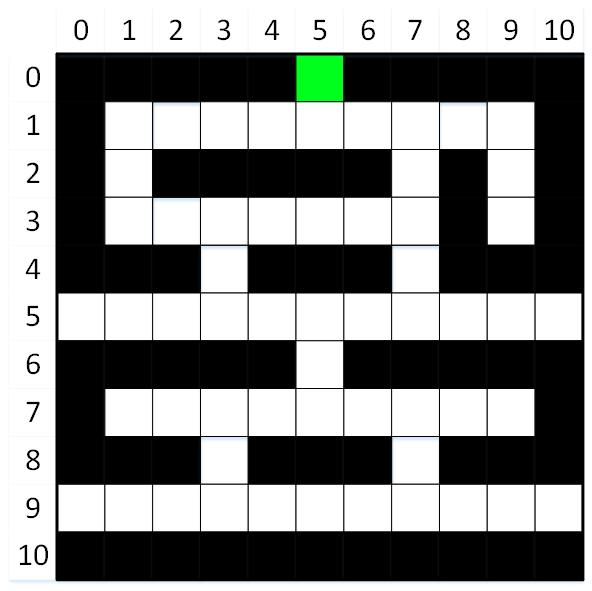

#### Import Required Libraries

In [5]:

import numpy as np

In [6]:
# Defining the shape of the environment
environment_rows=11
environment_columns=11

In [7]:
# Initialize the q-values
q_values=np.zeros((environment_rows, environment_columns, 4))

In [8]:
# Define actions
# Numeric action codes 0: up, 1: right, 2: down, 3: left
actions=['up','right','down','left']

rewards=np.full((environment_rows,environment_columns),-100)
rewards[0,5]=100
# Constructing a dictionary for aisles position
aisles={}
aisles[1]=[i for i in range(1,10)]
aisles[2]=[1,7,9]
aisles[3]=[i for i in range(1,8)]
aisles[3].append(9)
aisles[4]=[3,7]
aisles[5]=[i for i in range(11)]
aisles[6]=[5]
aisles[7]=[i for i in range(1,10)]
aisles[8]=[3,7]
aisles[9]=[i for i in range(11)]
print(aisles)
print(type(aisles))
print((type(rewards)))

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9], 2: [1, 7, 9], 3: [1, 2, 3, 4, 5, 6, 7, 9], 4: [3, 7], 5: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 6: [5], 7: [1, 2, 3, 4, 5, 6, 7, 8, 9], 8: [3, 7], 9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
<class 'dict'>
<class 'numpy.ndarray'>


In [10]:
for row_index in range(1,10):
    for col_index in aisles[row_index]:
        #print(col_index)
        rewards[row_index,col_index]=-1
print(rewards)
        
    

[[-100 -100 -100 -100 -100  100 -100 -100 -100 -100 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1 -100]
 [-100   -1 -100 -100 -100 -100 -100   -1 -100   -1 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1 -100   -1 -100]
 [-100 -100 -100   -1 -100 -100 -100   -1 -100 -100 -100]
 [  -1   -1   -1   -1   -1   -1   -1   -1   -1   -1   -1]
 [-100 -100 -100 -100 -100   -1 -100 -100 -100 -100 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1 -100]
 [-100 -100 -100   -1 -100 -100 -100   -1 -100 -100 -100]
 [  -1   -1   -1   -1   -1   -1   -1   -1   -1   -1   -1]
 [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100 -100]]


In [12]:
###Defining helper functions

### Determine if the state is terminal or not
def is_terminal_state(current_row_index, current_column_index):
    if rewards[current_row_index, current_column_index]==-1:
        return False
    else:
        return True
    
def get_starting_location():
    current_row_index=np.random.randint(environment_rows)
    current_column_index=np.random.randint(environment_columns)
    
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index=np.random.randint(environment_rows)
        current_column_index=np.random.randint(environment_columns)
    return current_row_index, current_column_index

### Define and epsilon-greedy algorithm to choose wchich action to take next
def get_next_action(current_row_index, current_column_index, epsilon):
    if np.random.random()<epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else:
        return np.random.randint(4)
    
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index=current_row_index
    new_column_index=current_column_index
    if actions[action_index]=='up' and current_row_index>0:
        new_row_index-=1
    elif actions[action_index]=='right' and current_column_index<environment_columns-1:
        new_column_index+=1
    elif actions[action_index]=='down' and current_row_index< environment_rows-1:
        new_row_index+=1
    elif actions[action_index]=='left' and current_column_index>0:
        new_column_index-=1
    return new_row_index, new_column_index

def get_shortest_path(start_row_index, start_column_index):
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else:
        current_row_index, current_column_index=start_row_index, start_column_index
        shortest_path=[]
        shortest_path.append([current_row_index,current_column_index])
        
        while not is_terminal_state(current_row_index, current_column_index):
            # get the best action to take
            action_index=get_next_action(current_row_index, current_column_index,1.)
            # move to the next location on path, and add that to the list
            current_row_index, current_column_index=get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
        return shortest_path

### Train the AI agent using Q-learning

In [13]:
### Define training parameters
epsilon=0.9
discount_factor=0.9
learning_rate=0.9

# run through 1000 training episodes
for episode in range(1000):
    # get the starting location for this episode
    row_index, column_index=get_starting_location()
    
    # continue taking actions until we reach terminal state
    while not is_terminal_state(row_index, column_index):
        action_index=get_next_action(row_index, column_index, epsilon)
        # transition to new state
        old_row_index, old_column_index=row_index, column_index
        row_index, column_index= get_next_location(row_index, column_index, action_index)
        # Receive the reward for transitioning to new state, and calculate the temporal difference
        reward=rewards[row_index, column_index]
        old_q_value=q_values[old_row_index, old_column_index, action_index]
        temporal_difference=reward+(discount_factor*np.max(q_values[row_index, column_index]))-old_q_value
        # Update the q_value for the previous state and action pair 
        new_q_value=old_q_value+(learning_rate*temporal_difference)
        q_values[old_row_index, old_column_index, action_index]=new_q_value
        
print("***** Training Complete ***********")
        
    
    

***** Training Complete ***********


In [14]:
print(get_shortest_path(0,5))
print(get_shortest_path(3,5))

[]
[[3, 5], [3, 6], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5], [0, 5]]


In [15]:
print(get_shortest_path(2,5))

[]
